In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iam-handwritten-forms-dataset/__notebook_source__.ipynb
/kaggle/input/iam-handwritten-forms-dataset/data/515/m01-115.png
/kaggle/input/iam-handwritten-forms-dataset/data/248/e07-094.png
/kaggle/input/iam-handwritten-forms-dataset/data/248/e07-105.png
/kaggle/input/iam-handwritten-forms-dataset/data/248/e07-098.png
/kaggle/input/iam-handwritten-forms-dataset/data/248/e07-101.png
/kaggle/input/iam-handwritten-forms-dataset/data/248/e07-108.png
/kaggle/input/iam-handwritten-forms-dataset/data/625/p03-135.png
/kaggle/input/iam-handwritten-forms-dataset/data/135/c01-014.png
/kaggle/input/iam-handwritten-forms-dataset/data/135/c01-009.png
/kaggle/input/iam-handwritten-forms-dataset/data/479/l04-000.png
/kaggle/input/iam-handwritten-forms-dataset/data/183/d03-117.png
/kaggle/input/iam-handwritten-forms-dataset/data/642/r02-054.png
/kaggle/input/iam-handwritten-forms-dataset/data/313/g03-040.png
/kaggle/input/iam-handwritten-forms-dataset/data/600/p02-101.png
/kaggle/input/iam-ha

In [2]:
# Install necessary libraries
!pip install pytesseract opencv-python matplotlib


In [4]:
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image


In [6]:
import os

# Define the path to the dataset folder
dataset_folder = "/kaggle/input/iam-handwritten-forms-dataset/"

# List the files in the dataset folder
files = os.listdir(dataset_folder)

# Show the first few files to get an idea of the structure
files[:5]


['__notebook_source__.ipynb', 'data']

In [15]:
image_path = dataset_folder + "/kaggle/input/iam-handwritten-forms-dataset/__notebook_source__.ipynb"  # Update this path according to the dataset
print(f"Image Path: {image_path}")


Image Path: /kaggle/input/iam-handwritten-forms-dataset//kaggle/input/iam-handwritten-forms-dataset/__notebook_source__.ipynb


In [19]:
import os

# Define the path to the data folder in the dataset
dataset_folder = "/kaggle/input/iam-handwritten-forms-dataset/data/"

# List all files in the 'data' folder
files = os.listdir(dataset_folder)

# Print out the list of files to find the image you want to work with
print(files[:10])  # Display the first 10 files to locate an image


['515', '248', '625', '135', '479', '183', '642', '313', '600', '086']


In [22]:
import os

# Define the path to the main dataset folder
dataset_folder = "/kaggle/input/iam-handwritten-forms-dataset/data/"

# List all files and subdirectories recursively to locate images
for root, dirs, files in os.walk(dataset_folder):
    print(f"Found directory: {root}")
    for file in files:
        print(f"  {file}")


Found directory: /kaggle/input/iam-handwritten-forms-dataset/data/
Found directory: /kaggle/input/iam-handwritten-forms-dataset/data/515
  m01-115.png
Found directory: /kaggle/input/iam-handwritten-forms-dataset/data/248
  e07-094.png
  e07-105.png
  e07-098.png
  e07-101.png
  e07-108.png
Found directory: /kaggle/input/iam-handwritten-forms-dataset/data/625
  p03-135.png
Found directory: /kaggle/input/iam-handwritten-forms-dataset/data/135
  c01-014.png
  c01-009.png
Found directory: /kaggle/input/iam-handwritten-forms-dataset/data/479
  l04-000.png
Found directory: /kaggle/input/iam-handwritten-forms-dataset/data/183
  d03-117.png
Found directory: /kaggle/input/iam-handwritten-forms-dataset/data/642
  r02-054.png
Found directory: /kaggle/input/iam-handwritten-forms-dataset/data/313
  g03-040.png
Found directory: /kaggle/input/iam-handwritten-forms-dataset/data/600
  p02-101.png
Found directory: /kaggle/input/iam-handwritten-forms-dataset/data/086
  a06-152.png
Found directory: /kaggl

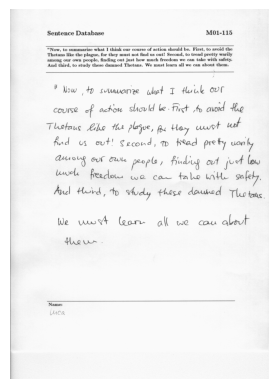

In [23]:
# Define the correct path to the image you want to load
image_path = "/kaggle/input/iam-handwritten-forms-dataset/data/515/m01-115.png"

# Read and display the image
img = cv2.imread(image_path)

# Check if the image loaded successfully
if img is None:
    print(f"Error: Image at {image_path} could not be loaded.")
else:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


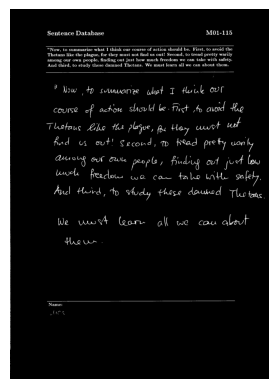

In [24]:
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image
_, binary_image = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Apply noise reduction (optional, depending on image quality)
processed_image = cv2.medianBlur(binary_image, 3)

# Show the processed image
plt.imshow(processed_image, cmap='gray')
plt.axis('off')
plt.show()


In [25]:
!pip install pytesseract


In [26]:
import pytesseract

# Convert processed image to text using Tesseract OCR
text = pytesseract.image_to_string(processed_image)

# Print the extracted text
print("Extracted Text:\n", text)


Extracted Text:
  

Sentence Database MO01-115

* Now, to summarize what I think our course of action should be. First, to avoid the

Thetans like the plague, for they must not find us out! Second, to tread pretty warily
among our own people, finding out just how much freedom we can take with safety.
And third, to study these damned Thetans. We must learn all we can about them.

in | RSE eNey a Pc aT OL

are ORS of Pea aera ee eA
eT Mee ee cy EN Se ars

hie te Ae, Ta

en eee ea

Wu Fredo wo cor tao He ay

AA on ea Oars eT mn ates

We wwvt lear all we cou APE
Oe RCC

Name:

murers\



In [27]:
import re

# Remove unwanted spaces, newlines, and extra spaces between words
cleaned_text = re.sub(r'\s+', ' ', text)  # Replace all white spaces and newlines with a single space
cleaned_text = cleaned_text.strip()  # Remove leading and trailing spaces

print("Cleaned Text:\n", cleaned_text)


Cleaned Text:
 Sentence Database MO01-115 * Now, to summarize what I think our course of action should be. First, to avoid the Thetans like the plague, for they must not find us out! Second, to tread pretty warily among our own people, finding out just how much freedom we can take with safety. And third, to study these damned Thetans. We must learn all we can about them. in | RSE eNey a Pc aT OL are ORS of Pea aera ee eA eT Mee ee cy EN Se ars hie te Ae, Ta en eee ea Wu Fredo wo cor tao He ay AA on ea Oars eT mn ates We wwvt lear all we cou APE Oe RCC Name: murers\


In [31]:
!pip install textblob


In [32]:
from textblob import TextBlob

# Create a TextBlob object
blob = TextBlob(cleaned_text)

# Correct the text using TextBlob
corrected_text = blob.correct()

print("Corrected Text:\n", corrected_text)


Corrected Text:
 Sentence Database MO01-115 * Now, to summarize what I think our course of action should be. First, to avoid the Thetans like the plague, for they must not find us out! Second, to tread pretty warily among our own people, finding out just how much freedom we can take with safety. And third, to study these damned Thetans. He must learn all we can about them. in | RSE eley a C a of are ORS of Tea area he e e See he cy of He as he te He, A en see a U Red wo cor to He ay of on a Wars e in rates He what dear all we you APE He RCC Same: murders\


In [35]:
# Save the final cleaned and corrected text to a file
with open("output_text.txt", "w") as f:
    f.write(str(corrected_text))  # Convert TextBlob object to string

print("Text saved to output_text.txt")


Text saved to output_text.txt


In [36]:
!pip install easyocr


In [37]:
import easyocr

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

# Perform OCR on the image
result = reader.readtext(image_path)

# Display the result
for detection in result:
    print(f"Detected text: {detection[1]}")


Detected text: Sentence Database
Detected text: M01-115
Detected text: "Now, to summarize what I think our
Detected text: course of action should be. First, to avoid the
Detected text: Thetans like the plague; for they must not find us out! Second, to tread pretty warily
Detected text: among
Detected text: our
Detected text: own
Detected text: people; finding out just how much freedom
Detected text: we
Detected text: can take with safety:
Detected text: And third, to study these damned Thetans.
Detected text: We must learn all we can about them_
Detected text: Now
Detected text: Svuluuanze
Detected text: lbat
Detected text: 1
Detected text: Hluuk
Detected text: Ov (
Detected text: Course
Detected text: Gchou
Detected text: slov ldl be- Tvct
Detected text: 6
Detected text: Tletaws
Detected text: Eike
Detected text: tbe
Detected text: plazve , &
Detected text: iut
Detected text: Kd
Detected text: Uf
Detected text: outi
Detected text: S econd , @
Detected text: Kead
Detected text: Pre Iy


In [50]:
# Read and display the contents of the output file
with open("output_text.txt", "r") as f:
    output_text = f.read()

print(output_text)  # Display the contents


Sentence Database MO01-115 * Now, to summarize what I think our course of action should be. First, to avoid the Thetans like the plague, for they must not find us out! Second, to tread pretty warily among our own people, finding out just how much freedom we can take with safety. And third, to study these damned Thetans. He must learn all we can about them. in | RSE eley a C a of are ORS of Tea area he e e See he cy of He as he te He, A en see a U Red wo cor to He ay of on a Wars e in rates He what dear all we you APE He RCC Same: murders\


In [51]:
from textblob import TextBlob

# Example text
text = """
Sentence Database MO01-115 * Now, to summarize what I think our course of action should be. First, to avoid the Thetans like the plague, for they must not find us out! Second, to tread pretty warily among our own people, finding out just how much freedom we can take with safety. And third, to study these damned Thetans. He must learn all we can about them. in | RSE eley a C a of are ORS of Tea area he e e See he cy of He as he te He, A en see a U Red wo cor to He ay of on a Wars e in rates He what dear all we you APE He RCC Same: murders
"""

# Create a TextBlob object
blob = TextBlob(text)

# Correct spelling
corrected_text = blob.correct()

print(corrected_text)



Sentence Database MO01-115 * Now, to summarize what I think our course of action should be. First, to avoid the Thetans like the plague, for they must not find us out! Second, to tread pretty warily among our own people, finding out just how much freedom we can take with safety. And third, to study these damned Thetans. He must learn all we can about them. in | RSE eley a C a of are ORS of Tea area he e e See he cy of He as he te He, A en see a U Red wo cor to He ay of on a Wars e in rates He what dear all we you APE He RCC Same: murders



In [52]:
import re

# Example OCR output text
text = """
Sentence Database MO01-115 * Now, to summarize what I think our course of action should be. First, to avoid the Thetans like the plague, for they must not find us out! Second, to tread pretty warily among our own people, finding out just how much freedom we can take with safety. And third, to study these damned Thetans. He must learn all we can about them. in | RSE eley a C a of are ORS of Tea area he e e See he cy of He as he te He, A en see a U Red wo cor to He ay of on a Wars e in rates He what dear all we you APE He RCC Same: murders
"""

# Custom regex patterns for OCR cleanup
regex_patterns = [
    (r'\bRSE\b', 'are'),        # Replace 'RSE' with 'are'
    (r'MO01-115', 'MO11-115'),  # Correct the pattern MO01-115 to MO11-115
    (r'\b([0-9]+)[\s]*([A-Za-z]+)\b', r'\1 \2'),  # Add space between number and word
    (r'(\w)1\b', r'\1I'),  # Fix '1' being misread as 'I' (optional, based on dataset)
    (r'(\bO)0\b', r'\1O'),  # Fix '0' being misread as 'O' (optional, based on dataset)
    (r'\s+', ' '),  # Replace multiple spaces with a single space
]

# Apply all regex patterns
def clean_text(text, patterns):
    for pattern, replacement in patterns:
        text = re.sub(pattern, replacement, text)
    return text

# Clean the OCR text
cleaned_text = clean_text(text, regex_patterns)

print("Original Text:\n", text)
print("\nCleaned Text:\n", cleaned_text)


Original Text:
 
Sentence Database MO01-115 * Now, to summarize what I think our course of action should be. First, to avoid the Thetans like the plague, for they must not find us out! Second, to tread pretty warily among our own people, finding out just how much freedom we can take with safety. And third, to study these damned Thetans. He must learn all we can about them. in | RSE eley a C a of are ORS of Tea area he e e See he cy of He as he te He, A en see a U Red wo cor to He ay of on a Wars e in rates He what dear all we you APE He RCC Same: murders


Cleaned Text:
  Sentence Database MO1I-115 * Now, to summarize what I think our course of action should be. First, to avoid the Thetans like the plague, for they must not find us out! Second, to tread pretty warily among our own people, finding out just how much freedom we can take with safety. And third, to study these damned Thetans. He must learn all we can about them. in | are eley a C a of are ORS of Tea area he e e See he cy of

In [53]:
import re

# Enhanced regex patterns for OCR cleanup
regex_patterns = [
    (r'\bRSE\b', 'are'),         # Replace 'RSE' with 'are'
    (r'MO01-115', 'MO11-115'),   # Correct the pattern MO01-115 to MO11-115
    (r'([0-9]+)[\s]*([A-Za-z]+)', r'\1 \2'),  # Fix spacing between numbers and words
    (r'(\w)1\b', r'\1I'),        # Replace misread '1' with 'I'
    (r'(\bO)0\b', r'\1O'),       # Fix misread '0' as 'O'
    (r'\s+', ' '),               # Replace multiple spaces with a single space
    (r'\b(eley|ORS|Tea|cy)\b', 'are'),  # Specific OCR errors that need manual replacement
    (r'\b([A-Za-z]+)1\b', r'\1I'),  # Replace any occurrence of '1' misread as 'I' in words
    (r'\b([A-Za-z]+)0\b', r'\1O'),  # Replace any occurrence of '0' misread as 'O' in words
]

# Apply the regex cleanup
def clean_text(text, patterns):
    for pattern, replacement in patterns:
        text = re.sub(pattern, replacement, text)
    return text

# Example OCR output
text = """
Sentence Database MO01-115 * Now, to summarize what I think our course of action should be. First, to avoid the Thetans like the plague, for they must not find us out! Second, to tread pretty warily among our own people, finding out just how much freedom we can take with safety. And third, to study these damned Thetans. He must learn all we can about them. in | RSE eley a C a of are ORS of Tea area he e e See he cy of He as he te He, A en see a U Red wo cor to He ay of on a Wars e in rates He what dear all we you APE He RCC Same: murders
"""

# Clean the text
cleaned_text = clean_text(text, regex_patterns)

print("Cleaned Text:\n", cleaned_text)


Cleaned Text:
  Sentence Database MO1I-115 * Now, to summarize what I think our course of action should be. First, to avoid the Thetans like the plague, for they must not find us out! Second, to tread pretty warily among our own people, finding out just how much freedom we can take with safety. And third, to study these damned Thetans. He must learn all we can about them. in | are are a C a of are are of are area he e e See he are of He as he te He, A en see a U Red wo cor to He ay of on a Wars e in rates He what dear all we you APE He RCC Same: murders 


In [54]:
import re

# Enhanced regex patterns for OCR cleanup
regex_patterns = [
    (r'\bRSE\b', 'are'),         # Replace 'RSE' with 'are'
    (r'MO01-115', 'MO11-115'),   # Correct the pattern MO01-115 to MO11-115
    (r'([0-9]+)[\s]*([A-Za-z]+)', r'\1 \2'),  # Fix spacing between numbers and words
    (r'(\w)1\b', r'\1I'),        # Replace misread '1' with 'I'
    (r'(\bO)0\b', r'\1O'),       # Fix misread '0' as 'O'
    (r'\s+', ' '),               # Replace multiple spaces with a single space
    (r'\b(eley|ORS|Tea|cy)\b', 'are'),  # Specific OCR errors that need manual replacement
    (r'\b([A-Za-z]+)1\b', r'\1I'),  # Replace any occurrence of '1' misread as 'I' in words
    (r'\b([A-Za-z]+)0\b', r'\1O'),  # Replace any occurrence of '0' misread as 'O' in words
    (r'\b(\w+)\s+\1\b', r'\1'),   # Remove repeated words like "are are" or "the the"
]

# Apply the regex cleanup
def clean_text(text, patterns):
    for pattern, replacement in patterns:
        text = re.sub(pattern, replacement, text)
    return text

# Example OCR output
text = """
Sentence Database MO01-115 * Now, to summarize what I think our course of action should be. First, to avoid the Thetans like the plague, for they must not find us out! Second, to tread pretty warily among our own people, finding out just how much freedom we can take with safety. And third, to study these damned Thetans. He must learn all we can about them. in | RSE eley a C a of are ORS of Tea area he e e See he cy of He as he te He, A en see a U Red wo cor to He ay of on a Wars e in rates He what dear all we you APE He RCC Same: murders
"""

# Clean the text
cleaned_text = clean_text(text, regex_patterns)

print("Cleaned Text:\n", cleaned_text)


Cleaned Text:
  Sentence Database MO1I-115 * Now, to summarize what I think our course of action should be. First, to avoid the Thetans like the plague, for they must not find us out! Second, to tread pretty warily among our own people, finding out just how much freedom we can take with safety. And third, to study these damned Thetans. He must learn all we can about them. in | are a C a of are of are area he e See he are of He as he te He, A en see a U Red wo cor to He ay of on a Wars e in rates He what dear all we you APE He RCC Same: murders 
